In [51]:
%%time
#General Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Wall time: 0 ns


In [52]:
%%time
SEED = 47
from sklearn.model_selection import train_test_split


from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier 

Wall time: 0 ns


2. Loading Data

In [53]:
%%time
# Load files
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
samplesubmission = pd.read_csv('SampleSubmission.csv')

# Preview train dataset
train.head()

Wall time: 54.1 ms


,ID,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius,Label
0,ID_4W8AP96UO6,114.798900,3790.450939,28.0,0.427078,6.162365,21.220403,58.492773,63.959387,0.621206,0.521813,24.624612,0.0,1001.533430,27.190843,1
1,ID_UD3TM0ZYND,14.154240,5182.451722,28.0,0.138876,5.399498,0.000000,22.886762,29.508369,0.422183,0.444403,0.044440,0.0,1089.121009,30.150941,0
2,ID_XAG1HC0HWM,0.044444,120.821253,28.0,0.000000,1.577765,0.000000,11.733239,12.888786,0.177776,0.155554,0.044444,0.0,322.464081,28.163287,0
3,ID_CEXD05IR09,31.369916,127228.251100,31.0,0.523750,15.981107,5.356671,602.125436,6976.986795,3.311801,5.756755,5.623394,0.0,12015.169690,34.204404,0
4,ID_X6E97FT8IF,5.046181,1091.620117,25.0,0.069468,1.356022,0.000000,16.138887,13.271234,0.155609,0.133379,0.000000,0.0,550.989619,31.466889,1


In [54]:
%%time
# Preview test dataset
test.head()

Wall time: 0 ns


,ID,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius
0,ID_L7RNFK5JC9,32.709430,121124.141400,30.407359,0.496719,3.999064,0.000000,335.565884,737.338490,1.844013,1.910664,0.311038,0.0,726.318848,20.008686
1,ID_KUTY5K1G5F,2.065990,2029.713475,29.000000,0.000000,3.665467,0.000000,63.845771,41.119875,0.733093,0.577589,0.044430,0.0,385.473839,33.015399
2,ID_H6PJWKU831,114.524684,3888.550764,28.000000,0.486075,0.777719,0.199985,11.354698,11.332477,0.177764,0.133323,0.000000,0.0,504.828540,30.091141
3,ID_DNQXNVTXHE,27.036810,5581.324782,25.000000,0.314968,1.789015,0.000000,44.297028,13.430214,0.302369,0.125987,0.000000,0.0,465.950312,22.211252
4,ID_8CRTF1BJOD,1.177267,176.634467,28.000000,0.000000,1.710369,0.000000,88.161746,57.508380,0.888503,0.777440,0.000000,0.0,771.665166,31.032570


In [55]:
%%time
# Preview sample submission file
samplesubmission.head()

Wall time: 0 ns


,ID,Target
0,ID_VT5SH34X8O,0
1,ID_4RQRV7XN3E,0
2,ID_1XCH999D2E,0
3,ID_J2ZBZIO0RW,0
4,ID_KG3PE5VXCN,0


In [56]:
%%time
# Check size and shape of datasets
train.shape, test.shape, samplesubmission.shape

Wall time: 0 ns


((8908, 16), (3818, 15), (3818, 2))

3. Statistical Summaries

In [57]:
%%time
# Train statistical summary
train.describe()

Wall time: 40.9 ms


,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius,Label
count,8908.000000,8.908000e+03,8908.000000,8908.000000,8908.000000,8908.000000,8908.000000,8.908000e+03,8908.000000,8908.000000,8908.000000,8908.000000,8908.000000,8908.000000,8908.000000
mean,36.429205,1.135564e+05,29.811900,0.496405,5.353260,1.046153,559.546628,1.655804e+04,4.795485,12.625792,0.988036,0.004177,2779.178084,28.436192,0.269870
std,75.884647,4.896846e+05,5.691411,1.593626,19.286690,15.667814,1939.745234,9.042803e+04,20.797585,61.246541,12.495768,0.082923,4996.003166,3.970140,0.443917
min,0.000000,0.000000e+00,1.000000,0.000000,0.044459,0.000000,1.197890,1.554938e+00,0.022183,0.022183,0.000000,0.000000,16.143987,18.057942,0.000000
25%,1.394404,8.136318e+02,27.000000,0.000000,0.755629,0.000000,33.843800,2.737770e+01,0.399999,0.333225,0.000000,0.000000,351.620535,25.266134,0.000000
50%,11.613803,4.930482e+03,28.000000,0.034734,1.711077,0.000000,67.366295,8.905770e+01,0.710898,0.635705,0.022222,0.000000,682.943866,28.543826,0.000000
75%,34.494953,3.940357e+04,30.000000,0.451350,5.845619,0.022229,221.314810,5.613814e+02,1.555063,1.711155,0.088887,0.000000,1356.673217,30.969542,1.000000
max,1795.316255,4.677280e+06,51.000000,25.246148,1064.819285,831.503948,98097.784300,4.812144e+06,1118.878021,3183.701036,475.031124,2.955622,98031.408630,46.784800,1.000000


In [58]:
%%time
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8908 entries, 0 to 8907
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        8908 non-null   object 
 1   I/O Data Operations       8908 non-null   float64
 2    I/O Data Bytes           8908 non-null   float64
 3   Number of subprocesses    8908 non-null   float64
 4   Time on processor         8908 non-null   float64
 5   Disk Reading/sec          8908 non-null   float64
 6   Disc Writing/sec          8908 non-null   float64
 7   Bytes Sent/sent           8908 non-null   float64
 8   Received Bytes (HTTP)     8908 non-null   float64
 9   Network packets sent      8908 non-null   float64
 10  Network packets received  8908 non-null   float64
 11  Pages Read/sec            8908 non-null   float64
 12  Pages Input/sec           8908 non-null   float64
 13  Page Errors/sec           8908 non-null   float64
 14  Confirme

In [59]:
%%time
# Check for missing values
train.isnull().sum().any(), test.isnull().sum().any()

Wall time: 6.98 ms


(False, False)

In [60]:
%%time
# Check for duplicates
train.duplicated().any(), test.duplicated().any()

Wall time: 28 ms


(False, False)

There are no missing values or duplicates

5. Target Distribution

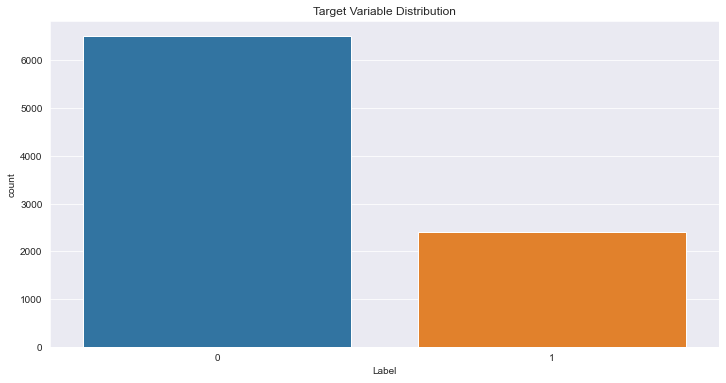

Wall time: 142 ms


In [61]:
%%time
# A box plot showing outliers
sns.set_style('darkgrid')
plt.figure(figsize=(12, 6))
sns.countplot(x = 'Label', data = train)
plt.title('Target Variable Distribution')
plt.show()

There is a class imbalance in our dataset, therefore we will find a way to address this

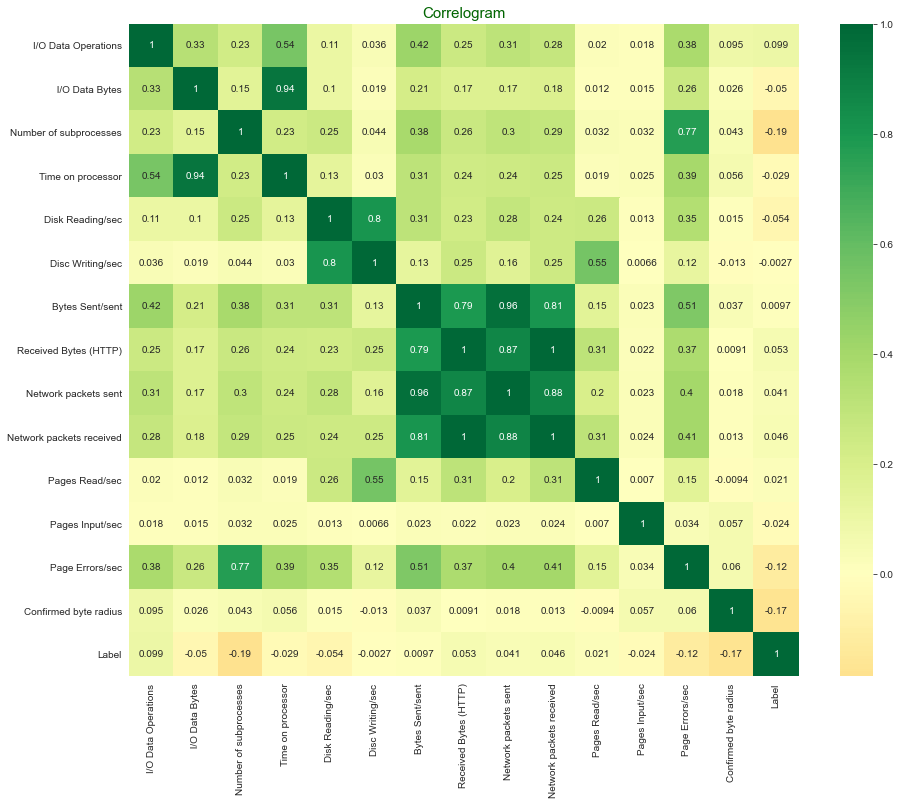

In [62]:
# Plotting a heatmap to show correlations between variables
corr = train.corr()
plt.figure(figsize = (15, 12))
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlogram', fontsize = 15, color = 'darkgreen')
plt.show()

The features that are highly correlated to the the target variable are Number of subprocesses, Page Errors/sec, Confirmed byte radius

6. Modeling¶

In [63]:
%%time
#scale numerical features for logistic model
features = train.drop(columns=['ID','Label']).columns
target = 'Label'

# define standard scaler
scaler = StandardScaler()

# transform data
train[features] = scaler.fit_transform(train[features])
test[features] = scaler.transform(test[features])

Wall time: 49.9 ms


In [64]:
%%time
train.columns

Wall time: 0 ns


Index(['ID', 'I/O Data Operations', ' I/O Data Bytes',
       'Number of subprocesses', 'Time on processor', 'Disk Reading/sec',
       'Disc Writing/sec', 'Bytes Sent/sent', 'Received Bytes (HTTP)',
       'Network packets sent', 'Network packets received', 'Pages Read/sec',
       'Pages Input/sec', 'Page Errors/sec', 'Confirmed byte radius', 'Label'],
      dtype='object')

In [65]:
%%time
#split train data into train and validation set
X_train, X_test, y_train, y_test = train_test_split(train[features], 
                                                    train[target].to_frame(),
                                                    stratify=train[target], #to account for class imbalance
                                                    test_size=0.3,
                                                    random_state=SEED)

Wall time: 7.98 ms


In [66]:
#Specify our models

lr = LogisticRegression()
nb = GaussianNB()
tree = DecisionTreeClassifier()
forest = RandomForestClassifier()
booster = XGBClassifier()

models = [lr, nb, tree, forest, booster]

In [46]:
#fit logistic regression model on rrain data
model = DecisionTreeClassifier()
model.fit(X_train, y_train['Label'])

#make predictions on validation set
preds = model.predict(X_test)

In [70]:
from sklearn import metrics

In [71]:
#Train models and evaluate
for model in models:
    print(model)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(metrics.classification_report(y_test, preds))
   # print('-'*50)

LogisticRegression()
              precision    recall  f1-score   support

           0       0.77      0.98      0.86      1952
           1       0.76      0.22      0.34       721

    accuracy                           0.77      2673
   macro avg       0.77      0.60      0.60      2673
weighted avg       0.77      0.77      0.72      2673

GaussianNB()
              precision    recall  f1-score   support

           0       0.73      0.95      0.83      1952
           1       0.34      0.06      0.11       721

    accuracy                           0.71      2673
   macro avg       0.54      0.51      0.47      2673
weighted avg       0.63      0.71      0.63      2673

DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1952
           1       0.89      0.87      0.88       721

    accuracy                           0.94      2673
   macro avg       0.92      0.92      0.92      2673
weighted avg   

C:\Users\kiptanui\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kiptanui\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-71-873295bd7b0d>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1952
           1       0.95      0.91      0.93       721

    accuracy                           0.96      2673
   macro avg       0.96      0.95      0.95      2673
weighted avg       0.96      0.96      0.96      2673

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None,

In [78]:
#since the XGBoost has a better performance, we choose it
model = XGBClassifier()
X_train, X_test, y_train, y_test = train_test_split(train[features], train[target], test_size = 0.3, random_state = SEED)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [79]:
#make predictions on test set
test['Target'] = model.predict(test[features])

In [80]:
sub = test[['ID', 'Target']]

In [81]:
sub.to_csv("D:/VOLUME E/DATA SCIENCE/INSIGHTS/Credit Card F raud Detection/UHA_23_crypto_3.csv", index = False)